In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.io import arff
from pprint import pprint

warnings.filterwarnings('ignore')
%matplotlib inline

In [29]:
# Function to convert byte strings in the data to numeric types
def convert_byte_strings_to_numbers(data):
    converted_data = []
    for row in data:
        converted_row = []
        for value in row:
            if isinstance(value, bytes):
                # Convert byte strings to float (or int if you are sure they are integers)
                converted_value = int(value.decode('utf-8'))
            else:
                converted_value = value
            converted_row.append(converted_value)
        converted_data.append(tuple(converted_row))
    return converted_data

# Load the ARFF file
data, meta = arff.loadarff('../data/Training Dataset.arff')
# Convert byte strings to numbers
converted_data = convert_byte_strings_to_numbers(data)

# Convert to a pandas DataFrame
df = pd.DataFrame(converted_data, columns=meta.names())


In [32]:
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [35]:
df.shape

(11055, 31)

In [36]:
df.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [40]:
df.duplicated().sum()

5206

In [42]:
df = df.drop_duplicates()

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5849 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            5849 non-null   int64
 1   URL_Length                   5849 non-null   int64
 2   Shortining_Service           5849 non-null   int64
 3   having_At_Symbol             5849 non-null   int64
 4   double_slash_redirecting     5849 non-null   int64
 5   Prefix_Suffix                5849 non-null   int64
 6   having_Sub_Domain            5849 non-null   int64
 7   SSLfinal_State               5849 non-null   int64
 8   Domain_registeration_length  5849 non-null   int64
 9   Favicon                      5849 non-null   int64
 10  port                         5849 non-null   int64
 11  HTTPS_token                  5849 non-null   int64
 12  Request_URL                  5849 non-null   int64
 13  URL_of_Anchor                5849 non-null   in

In [44]:
df.nunique()

having_IP_Address              2
URL_Length                     3
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  2
having_Sub_Domain              3
SSLfinal_State                 3
Domain_registeration_length    2
Favicon                        2
port                           2
HTTPS_token                    2
Request_URL                    2
URL_of_Anchor                  3
Links_in_tags                  3
SFH                            3
Submitting_to_email            2
Abnormal_URL                   2
Redirect                       2
on_mouseover                   2
RightClick                     2
popUpWidnow                    2
Iframe                         2
age_of_domain                  2
DNSRecord                      2
web_traffic                    3
Page_Rank                      2
Google_Index                   2
Links_pointing_to_page         3
Statistical_report             2
Result    

In [52]:
[{col: df[col].unique()} for col in df.columns]

[{'having_IP_Address': array([-1,  1], dtype=int64)},
 {'URL_Length': array([ 1,  0, -1], dtype=int64)},
 {'Shortining_Service': array([ 1, -1], dtype=int64)},
 {'having_At_Symbol': array([ 1, -1], dtype=int64)},
 {'double_slash_redirecting': array([-1,  1], dtype=int64)},
 {'Prefix_Suffix': array([-1,  1], dtype=int64)},
 {'having_Sub_Domain': array([-1,  0,  1], dtype=int64)},
 {'SSLfinal_State': array([-1,  1,  0], dtype=int64)},
 {'Domain_registeration_length': array([-1,  1], dtype=int64)},
 {'Favicon': array([ 1, -1], dtype=int64)},
 {'port': array([ 1, -1], dtype=int64)},
 {'HTTPS_token': array([-1,  1], dtype=int64)},
 {'Request_URL': array([ 1, -1], dtype=int64)},
 {'URL_of_Anchor': array([-1,  0,  1], dtype=int64)},
 {'Links_in_tags': array([ 1, -1,  0], dtype=int64)},
 {'SFH': array([-1,  1,  0], dtype=int64)},
 {'Submitting_to_email': array([-1,  1], dtype=int64)},
 {'Abnormal_URL': array([-1,  1], dtype=int64)},
 {'Redirect': array([0, 1], dtype=int64)},
 {'on_mouseover': 

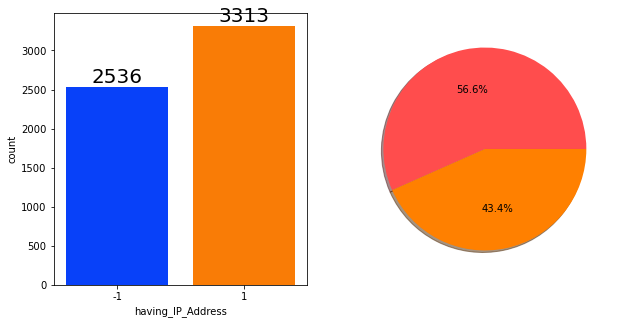

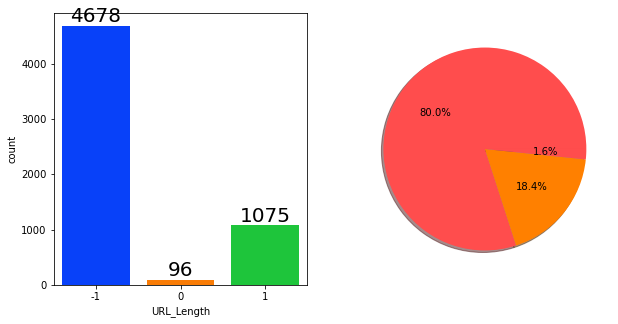

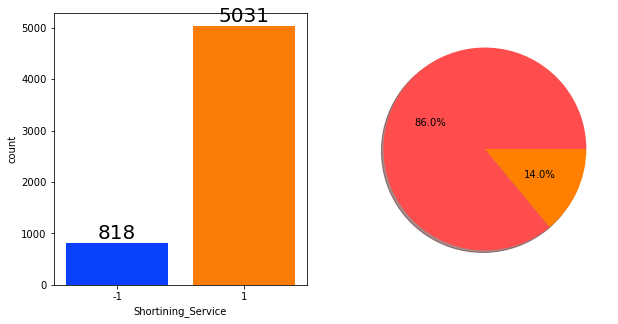

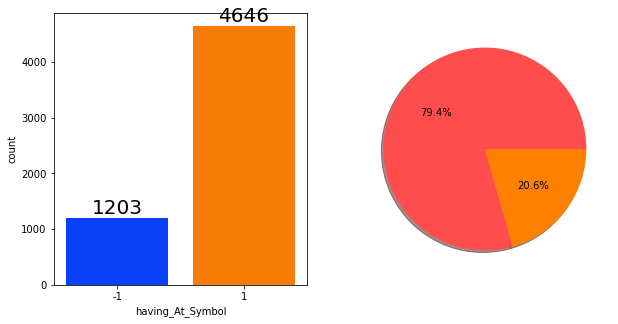

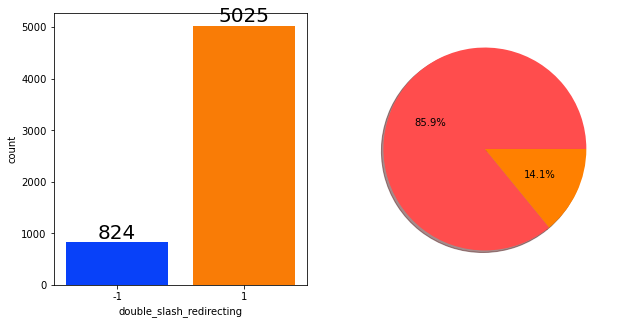

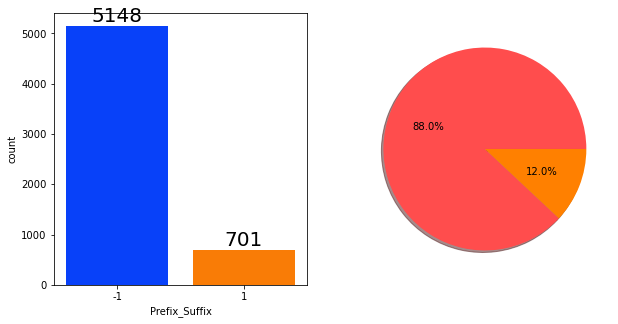

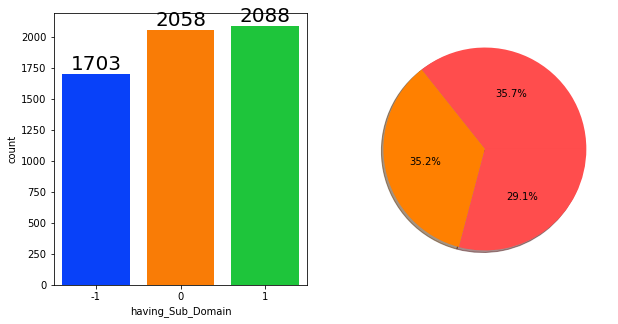

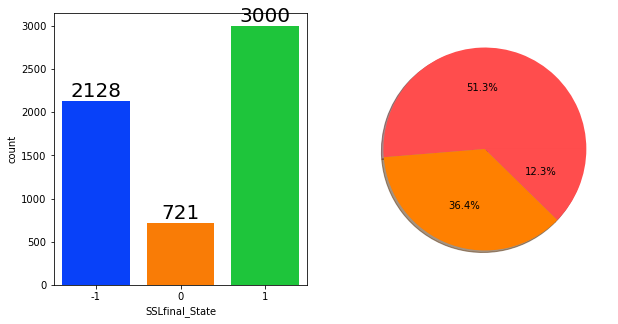

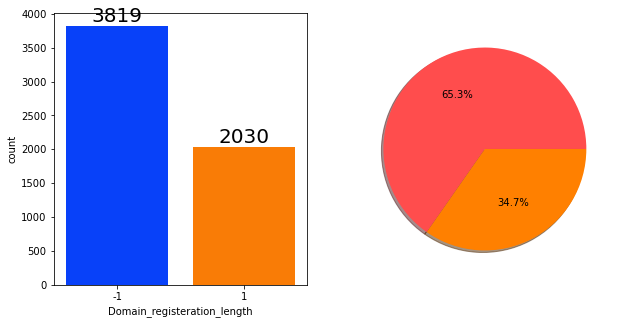

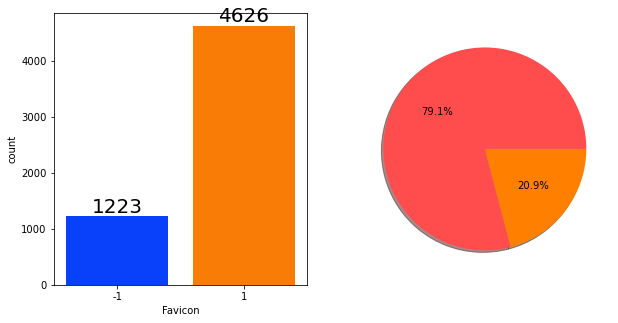

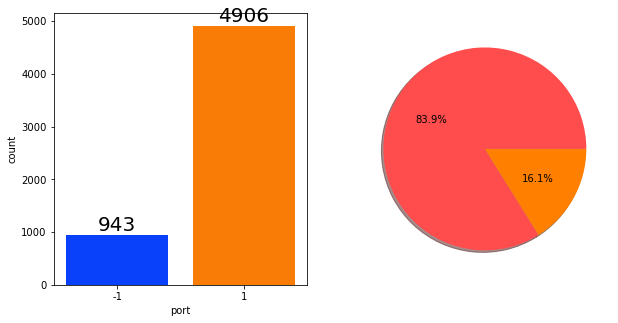

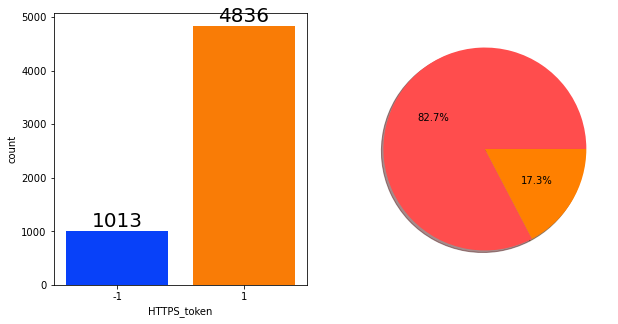

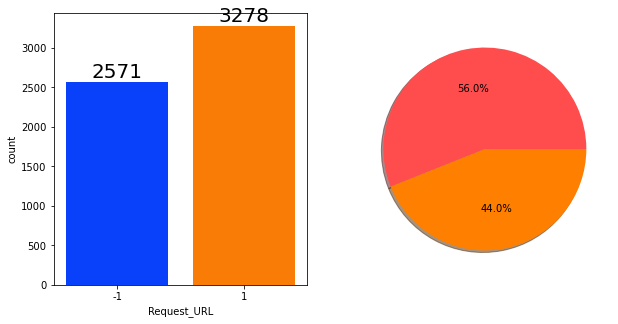

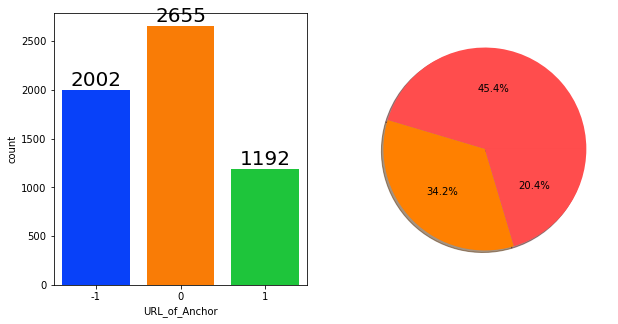

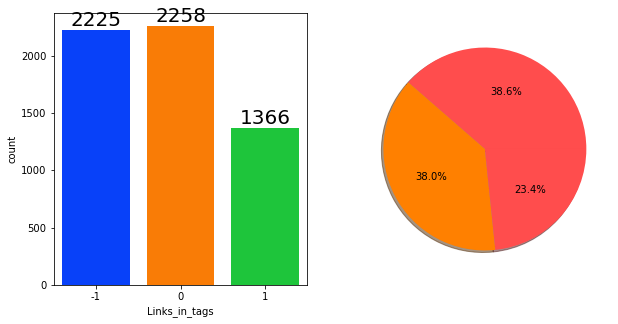

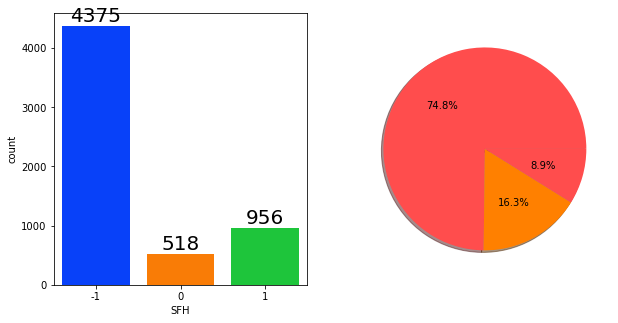

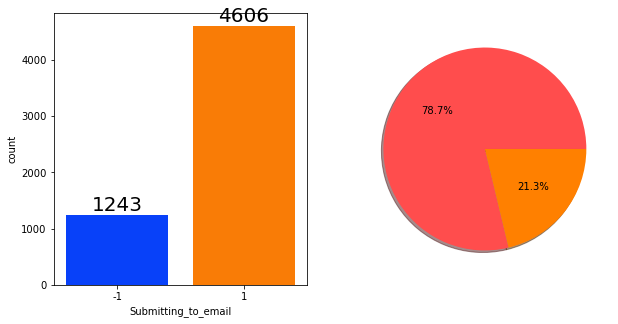

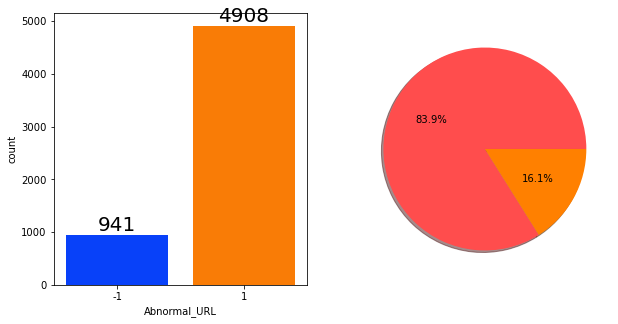

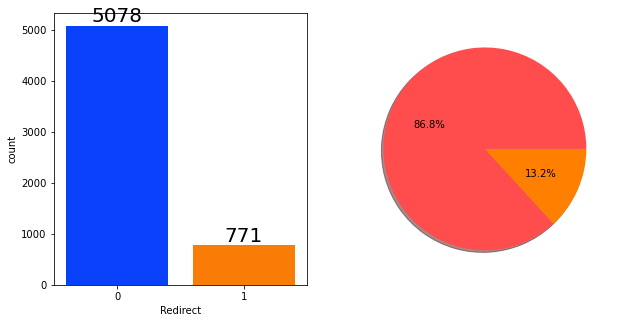

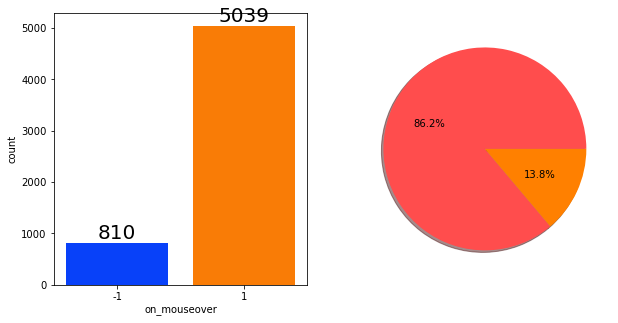

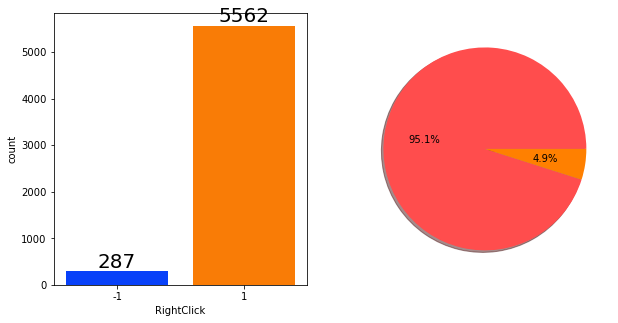

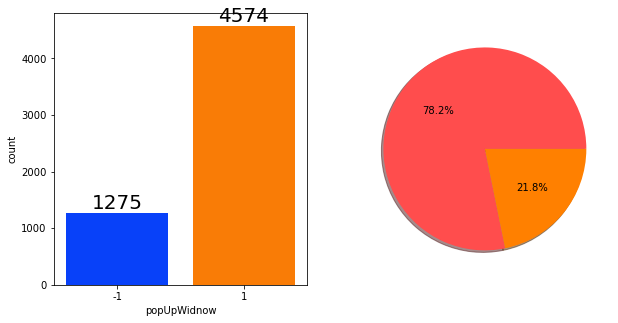

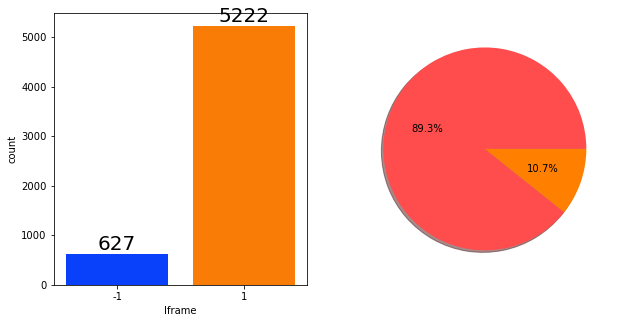

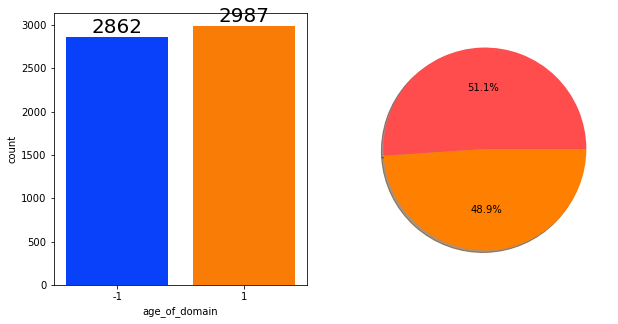

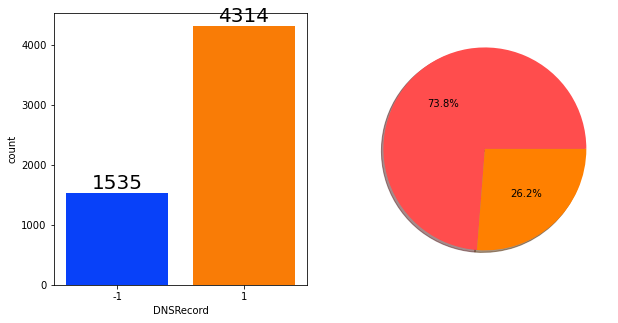

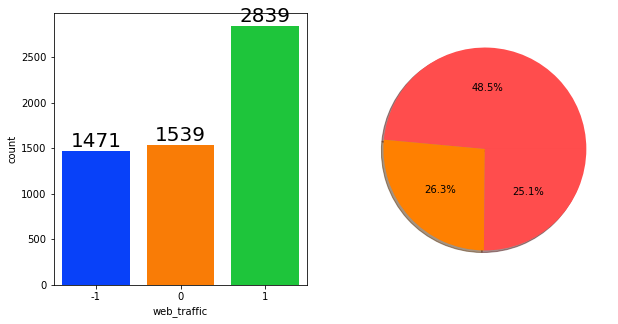

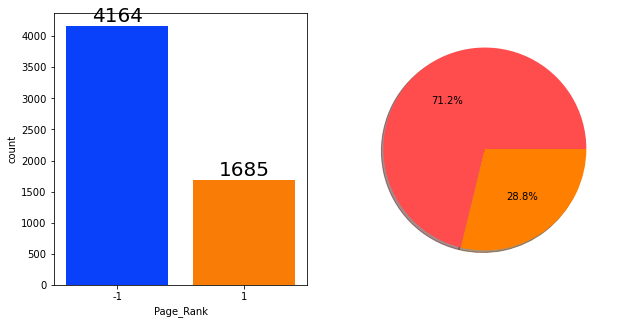

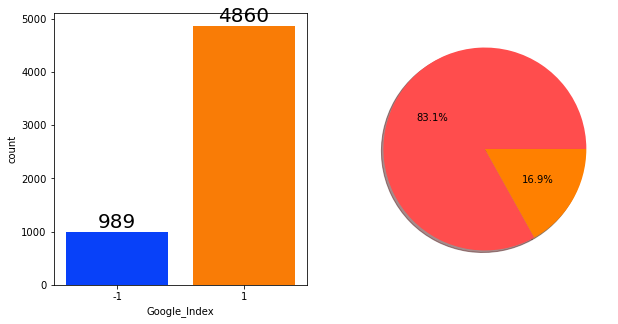

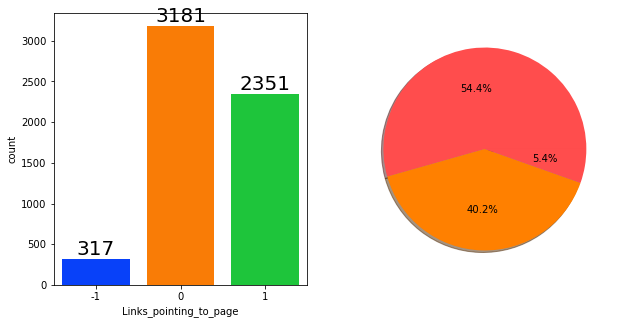

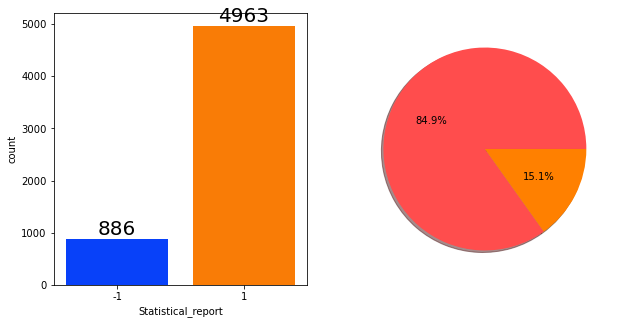

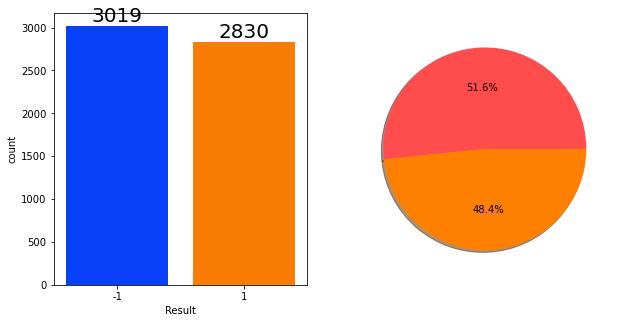

In [57]:
for col in df.columns:
    f,ax=plt.subplots(1,2,figsize=(10,5))
    sns.countplot(x=df[col],data=df,palette ='bright',ax=ax[0],saturation=0.95)
    for container in ax[0].containers:
        ax[0].bar_label(container,color='black',size=20)

    plt.pie(x=df[col].value_counts(),autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
    plt.show()

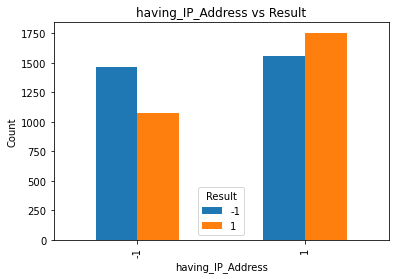

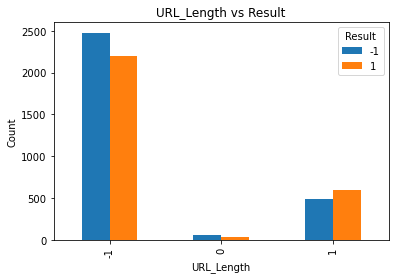

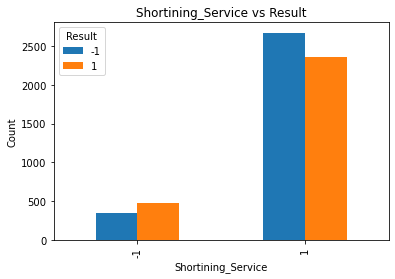

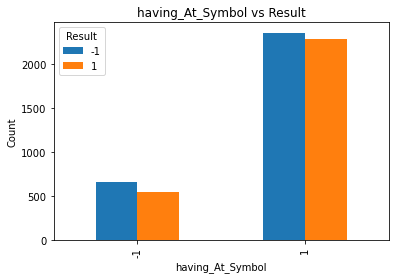

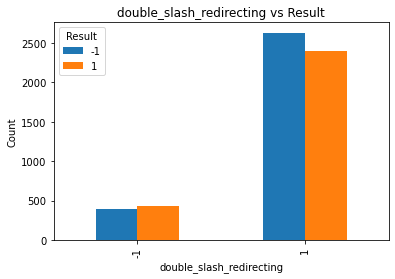

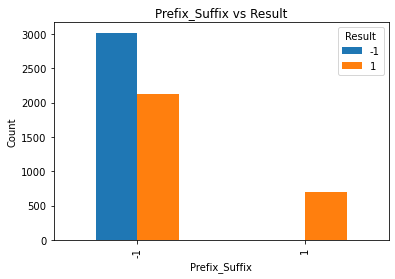

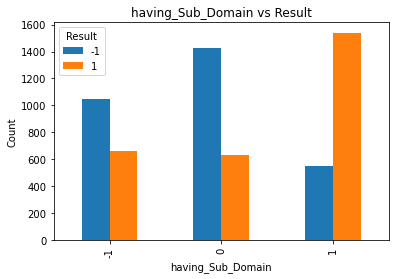

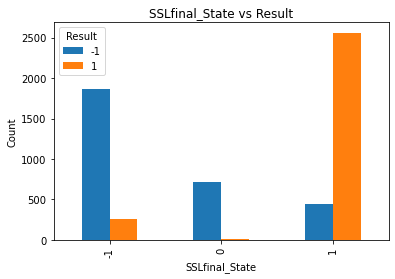

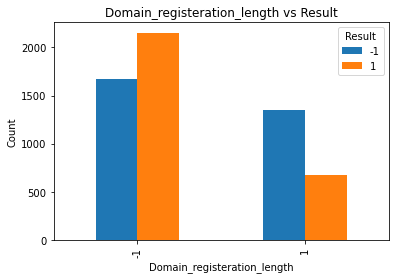

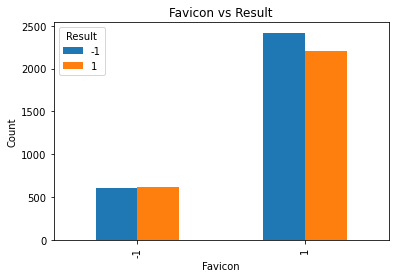

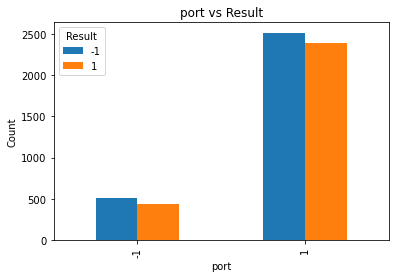

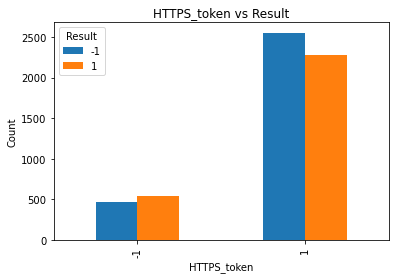

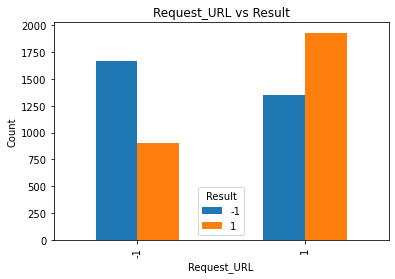

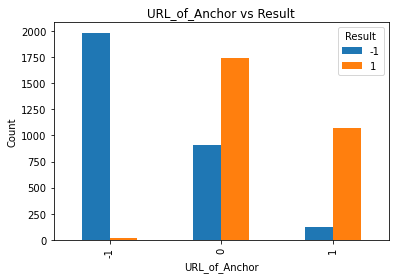

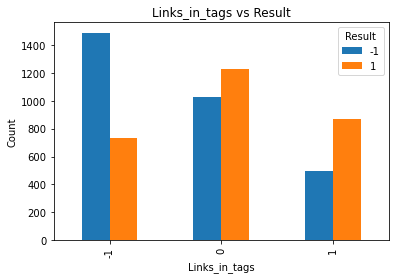

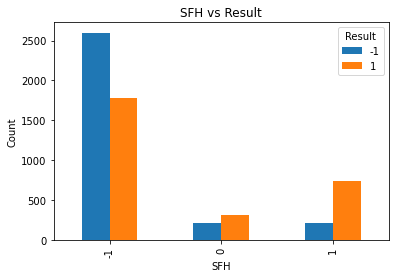

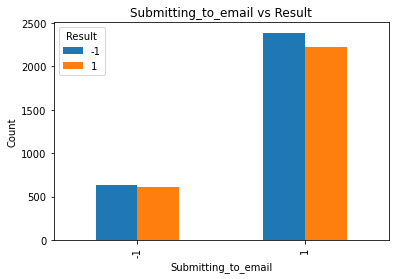

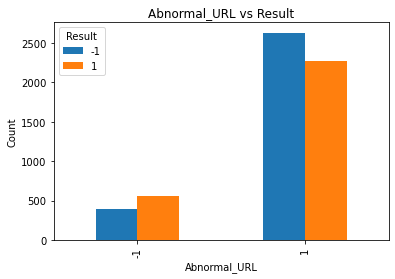

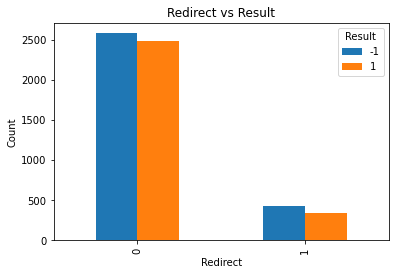

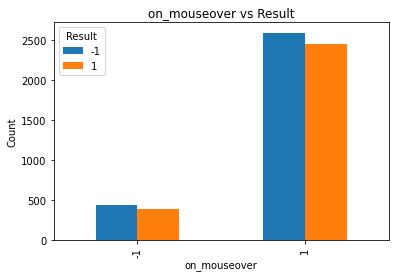

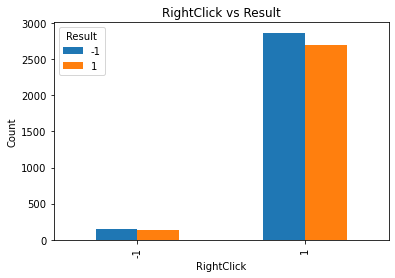

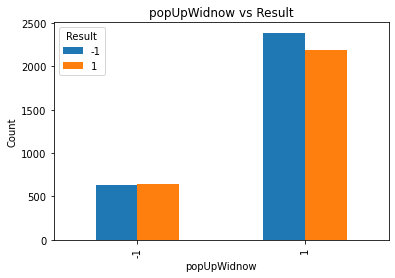

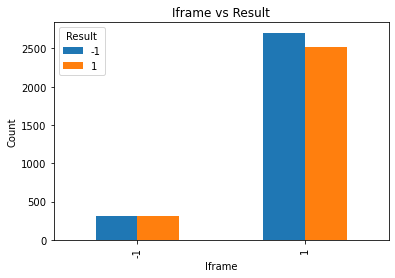

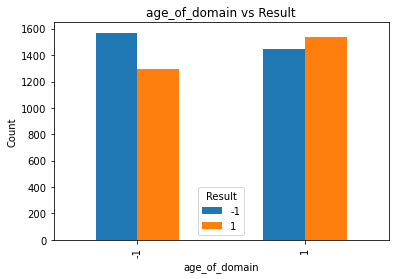

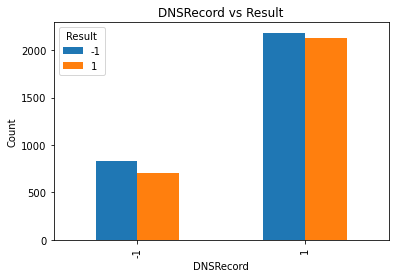

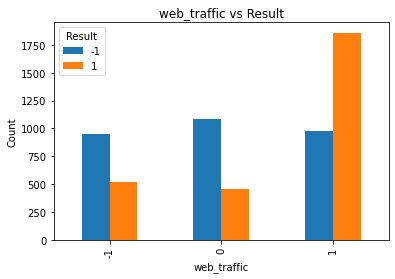

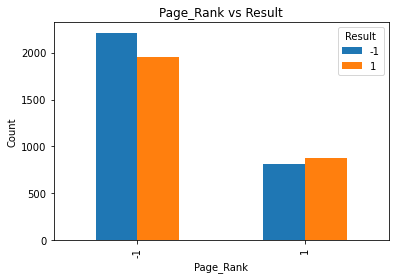

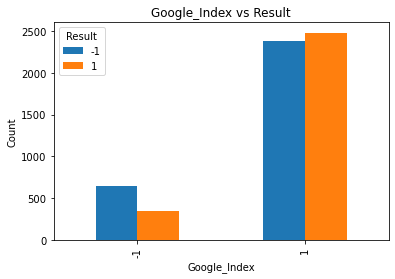

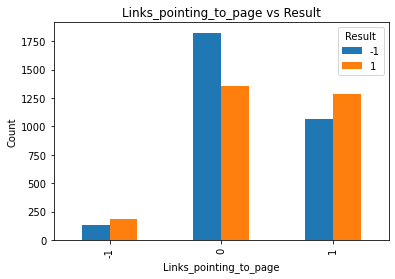

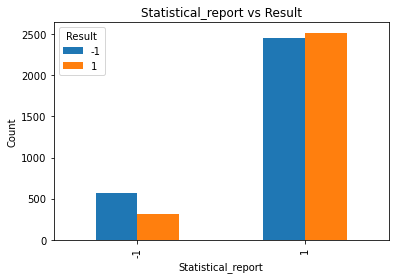

In [65]:
for col in df.columns:
    if col != 'Result':
        crosstab = pd.crosstab(df[col], df['Result'])
        crosstab.plot(kind='bar')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.title(f'{col} vs Result')
        plt.show()

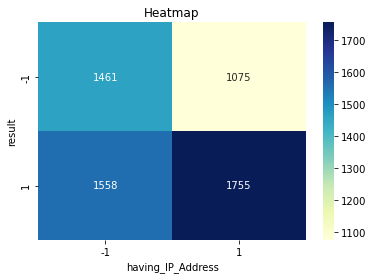

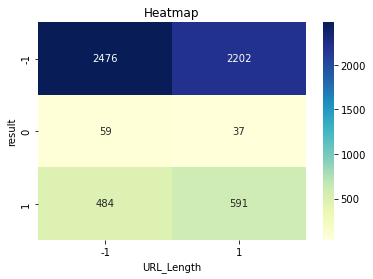

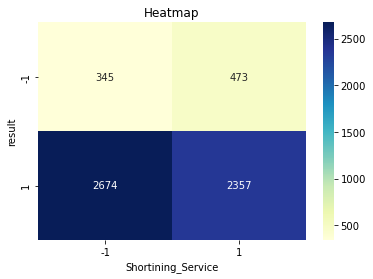

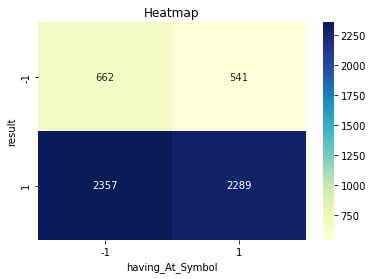

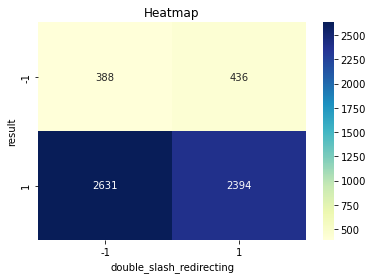

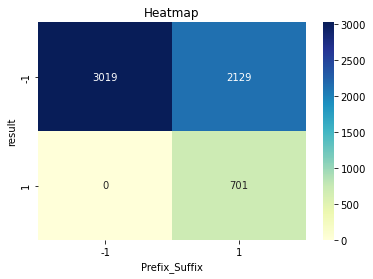

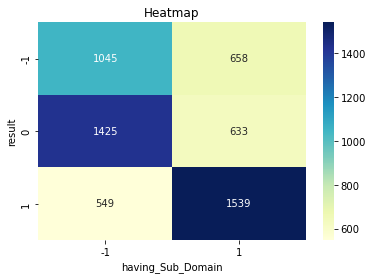

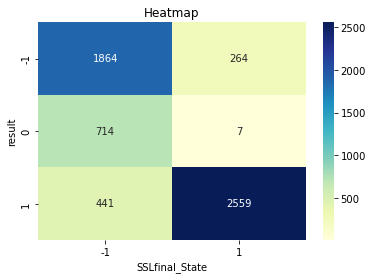

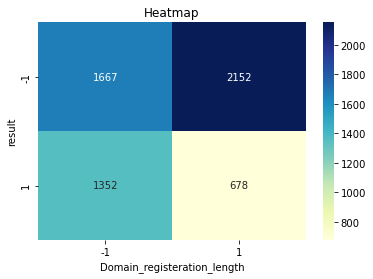

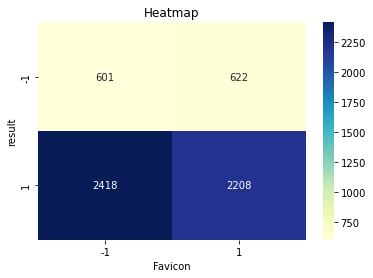

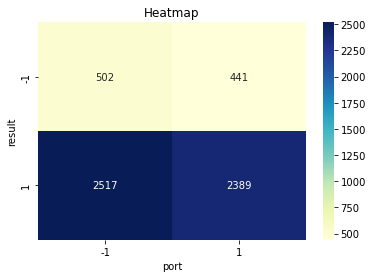

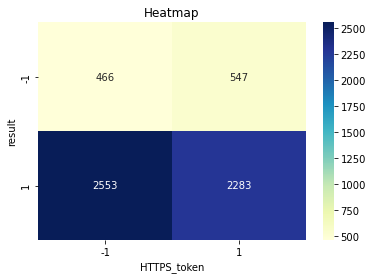

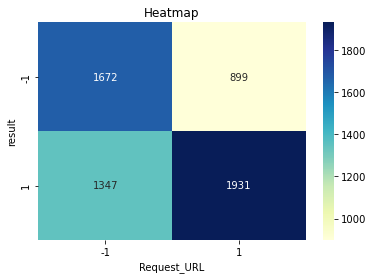

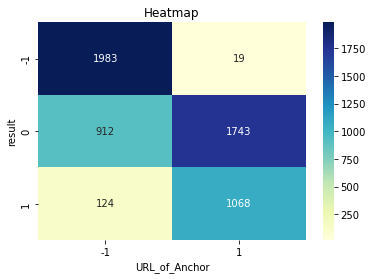

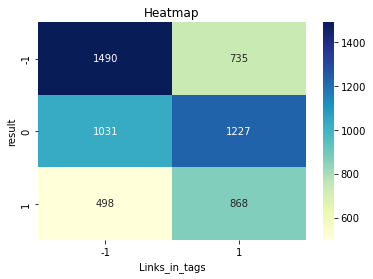

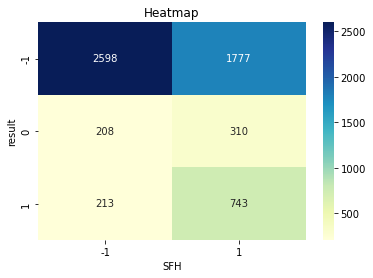

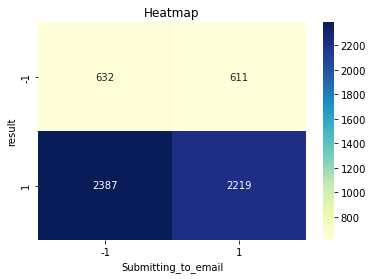

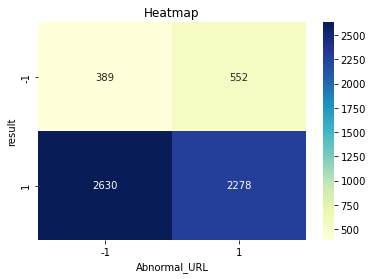

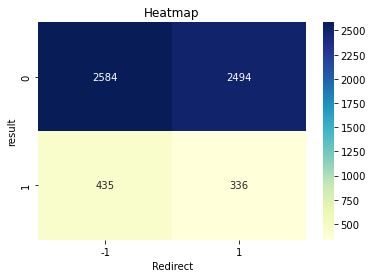

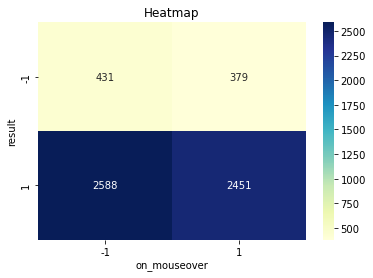

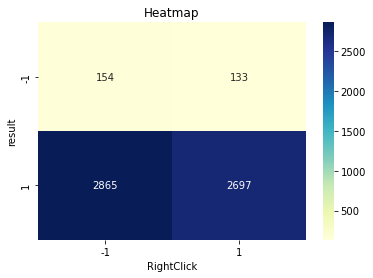

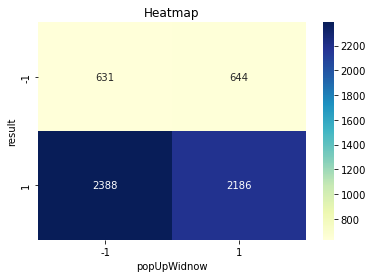

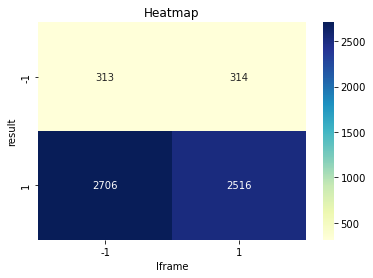

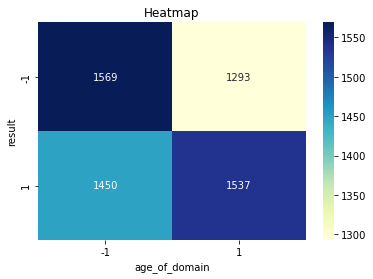

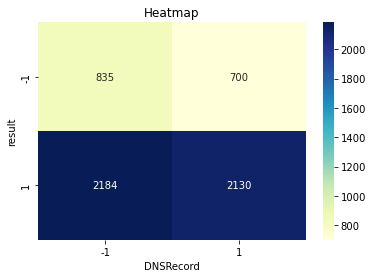

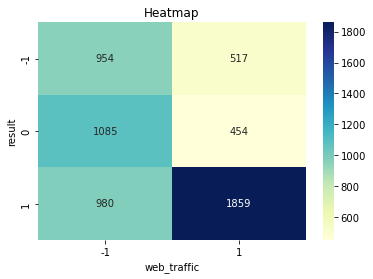

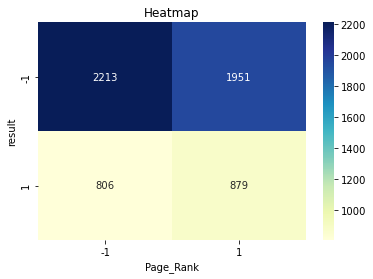

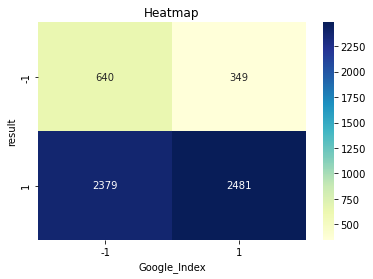

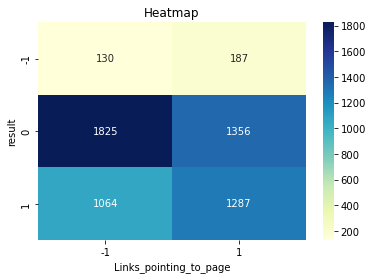

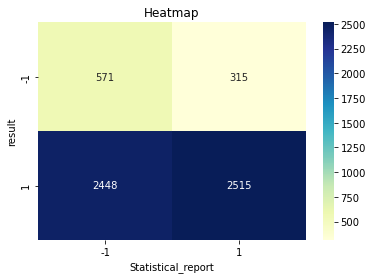

In [69]:
for col in df.columns:
    if col != 'Result':
        crosstab = pd.crosstab(df[col], df['Result'])
        sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
        plt.xlabel(col)
        plt.ylabel('result')
        plt.title('Heatmap')
        plt.show()

In [ ]:
sns.pairplot(df,hue = 'Result')
plt.show()